In [1]:
import json
import requests
import datetime as dt
import numpy as np
import pandas as pd
from binance.client import Client
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import sklearn
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
#Getting data for last year with 1h interval

In [3]:
api_key='hKmlFuyZiyNlaN6ARvCKnhF5owS6yrVJolMeSBfThE5Hc6L26aRM2Z3N8EuVQf0y'
secret_key='B4c5Cr9vwsubR19XK05axHk6aSGhnP91GdXLY57LlaYoUNMf4s5egKIHhtgfJYAd'

In [4]:
client = Client(api_key, secret_key)

In [5]:
df= pd.DataFrame(client.get_historical_klines('BTCUSDT','1h',
                                              str((dt.datetime.now() - dt.timedelta(weeks=52))),
                                              str((dt.datetime.now()))))
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1658253600000,23460.08000000,23525.96000000,23221.48000000,23410.55000000,10007.44257000,1658257199999,234109571.95667500,238501,4864.95210000,113820506.57585780,0
1,1658257200000,23410.55000000,23706.26000000,23346.43000000,23401.99000000,9879.81782000,1658260799999,232464952.43206230,245953,4932.41774000,116074477.64893160,0
2,1658260800000,23399.88000000,23443.57000000,23147.14000000,23300.14000000,7519.21665000,1658264399999,175020768.92446540,193515,3674.98932000,85550597.10749340,0
3,1658264400000,23303.93000000,23800.00000000,23253.38000000,23650.26000000,6995.05476000,1658267999999,164557084.81995620,196785,3812.06571000,89699106.37893780,0
4,1658268000000,23650.26000000,23659.15000000,23334.76000000,23501.76000000,5315.26048000,1658271599999,124848420.55269250,169712,2552.30903000,59948756.84106000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8727,1689674400000,29956.95000000,30029.84000000,29908.00000000,29990.65000000,1128.41237000,1689677999999,33811841.46131700,25626,530.21864000,15886810.92748950,0
8728,1689678000000,29990.65000000,30073.41000000,29810.00000000,29884.01000000,1843.38729000,1689681599999,55197264.92339180,39288,827.66878000,24784304.10512030,0
8729,1689681600000,29884.00000000,29918.20000000,29725.24000000,29784.00000000,2618.78592000,1689685199999,78109456.15902520,64310,1241.18161000,37018171.21101250,0
8730,1689685200000,29783.99000000,29869.00000000,29675.00000000,29831.99000000,2150.87100000,1689688799999,64081345.28968740,51393,984.93895000,29348082.05641040,0


In [6]:
df.columns=['open_time','open','high','low','close','volume',
           'close_time','q_vol','trades','taker_buy_volume',
            'taker_q_volume','ignored']

In [7]:
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['open_time'], unit='ms')

In [8]:
df = df.set_index('open_time')

In [9]:
df['const'] = np.ones(len(df))

In [10]:
df['trend'] = np.arange(len(df))
df['time'] = df.index 
df=df.drop('close_time',axis=1)
df=df.astype(np.float32,errors='ignore')
df

,open,high,low,close,volume,q_vol,trades,taker_buy_volume,taker_q_volume,ignored,const,trend,time
open_time,,,,,,,,,,,,,
2022-07-19 18:00:00,23460.080078,23525.960938,23221.480469,23410.550781,10007.442383,234109568.0,238501.0,4864.952148,113820504.0,0.0,1.0,0.0,2022-07-19 18:00:00
2022-07-19 19:00:00,23410.550781,23706.259766,23346.429688,23401.990234,9879.817383,232464960.0,245953.0,4932.417969,116074480.0,0.0,1.0,1.0,2022-07-19 19:00:00
2022-07-19 20:00:00,23399.880859,23443.570312,23147.140625,23300.140625,7519.216797,175020768.0,193515.0,3674.989258,85550600.0,0.0,1.0,2.0,2022-07-19 20:00:00
2022-07-19 21:00:00,23303.929688,23800.000000,23253.380859,23650.259766,6995.054688,164557088.0,196785.0,3812.065674,89699104.0,0.0,1.0,3.0,2022-07-19 21:00:00
2022-07-19 22:00:00,23650.259766,23659.150391,23334.759766,23501.759766,5315.260254,124848424.0,169712.0,2552.309082,59948756.0,0.0,1.0,4.0,2022-07-19 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18 10:00:00,29956.949219,30029.839844,29908.000000,29990.650391,1128.412354,33811840.0,25626.0,530.218628,15886811.0,0.0,1.0,8727.0,2023-07-18 10:00:00
2023-07-18 11:00:00,29990.650391,30073.410156,29810.000000,29884.009766,1843.387329,55197264.0,39288.0,827.668762,24784304.0,0.0,1.0,8728.0,2023-07-18 11:00:00
2023-07-18 12:00:00,29884.000000,29918.199219,29725.240234,29784.000000,2618.785889,78109456.0,64310.0,1241.181641,37018172.0,0.0,1.0,8729.0,2023-07-18 12:00:00


<Axes: xlabel='time', ylabel='open'>

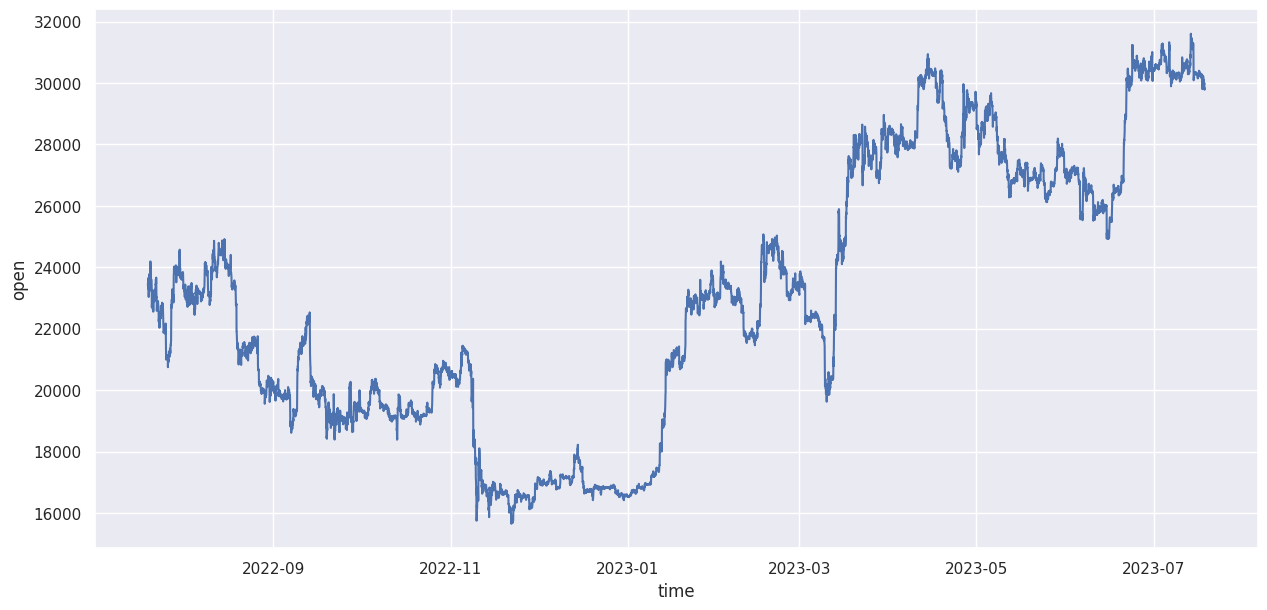

In [11]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x='time',y='open')

In [12]:
#correlation between trades and open price

<Axes: xlabel='open', ylabel='trades'>

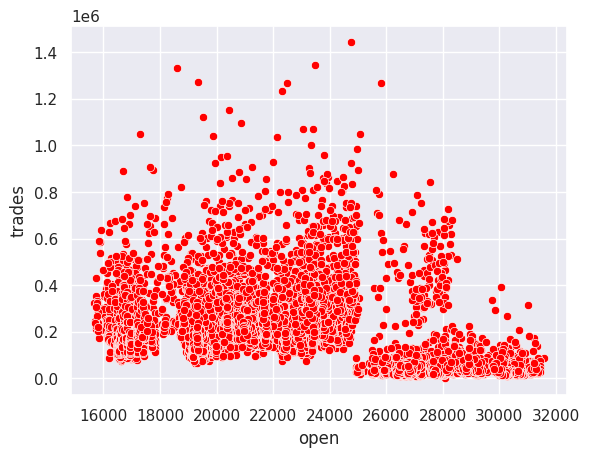

In [13]:
sns.scatterplot(data=df, x='open',y='trades',c='red')

In [14]:
#CREATING TIME TREND FEATURE

In [15]:
df['trend_2']=df.trend**2
df['trend_3']=df.trend**3
df['trend_4']=df.trend**4
X_time_trend=df[['trend','trend_2','trend_3','trend_4']]
y=df['open']

In [16]:
y_dummy = np.ones(len(y))*y.mean()

In [19]:
def check_model_full(model, X, y):
    model.fit(X, y)
    y_pred_1 = model.predict(X)
    print(f'r2 {r2_score(y,y_pred_1)}, absolute {mean_absolute_error(y,y_pred_1)}')
    sns.lineplot(data=df,x='time',y='open')
    sns.lineplot(x=df.time,y=y_pred_1,c='red')

/home/kilka/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.480e+10, tolerance: 1.725e+07
  model = cd_fast.enet_coordinate_descent(


r2 0.8284372700693201, absolute 1579.2799072265625


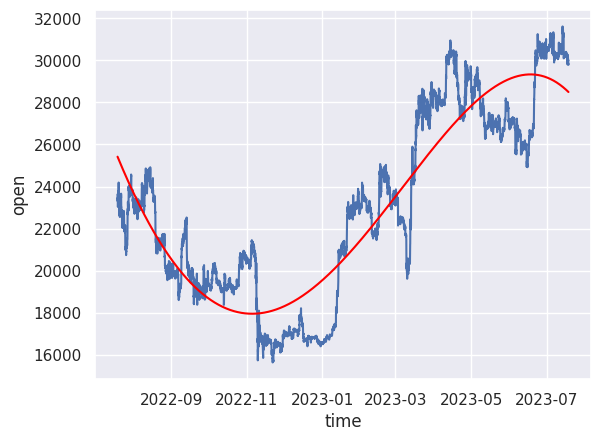

In [24]:
check_model_full(Lasso(), X_time_trend, y)

r2 0.9808770487583135, absolute 434.664794921875


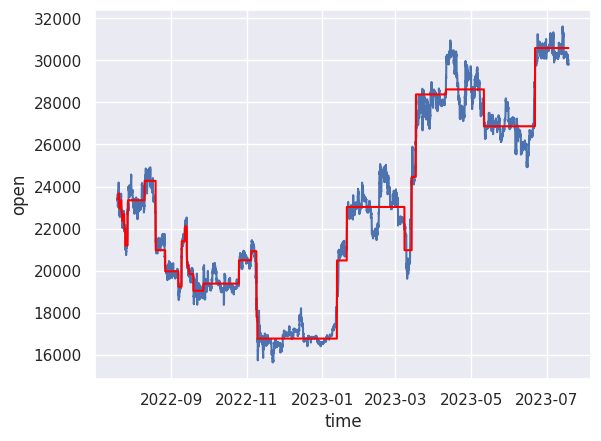

In [25]:
check_model_full(XGBRegressor(n_estimators=2, max_depth=5, learning_rate=1), X_time_trend, y)

In [26]:
check_model_full(RandomForestRegressor(n_estimators=2, max_depth=5, learning_rate=1), X_time_trend, y)

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'learning_rate'

In [ ]:
#CREATE MOVING AVERAGE

In [ ]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    return rolling_mean

In [ ]:
#weekly 

In [ ]:
days=1/12
mov_av = plotMovingAverage(y,24*days)

In [ ]:
print(f'r2 {r2_score(y[24*days:],mov_av[24*5:])}, absolute {mean_absolute_error(y[24*5:],mov_av[24*5:])}')